## Churn Preliminary Analysis

In [1]:
#importing libraries for graphical representation and data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#reading the data using df as the data frame
df=pd.read_csv('Bank Customer Churn Prediction.csv')

## Data analysis

In [3]:
#finding the shape of the data
#data has 10,000 data values and 12 columns
df.shape

(10000, 12)

In [4]:
#printing the columns of the dataset
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [5]:
#printing the first 5 rows from the dataset
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# looking at the first 5 from the dataset, there are multiple categorical variables such as:
#country, gender, products_number, credit_card, active_member, and churn 

In [7]:
#Finding information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
#finding missing values
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [9]:
#finding unique values
print(df.nunique())

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64


In [10]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Correlation table & Matrix

In [11]:
#since there are categorical variables in this table that do not make sense such as products_number
# i will make a new table to display the data actually needed for analysis
# will create a new value called df2 to not get confused 
df2=pd.DataFrame(df)

In [12]:
df2=df2[['age','credit_score','customer_id','tenure','balance','estimated_salary']]

In [13]:
df2.head()

,age,credit_score,customer_id,tenure,balance,estimated_salary
0,42,619,15634602,2,0.00,101348.88
1,41,608,15647311,1,83807.86,112542.58
2,42,502,15619304,8,159660.80,113931.57
3,39,699,15701354,1,0.00,93826.63
4,43,850,15737888,2,125510.82,79084.10


In [14]:
#displays the new table with important values needed for analysis
df2.describe()

,age,credit_score,customer_id,tenure,balance,estimated_salary
count,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,38.921800,650.528800,1.569094e+07,5.012800,76485.889288,100090.239881
std,10.487806,96.653299,7.193619e+04,2.892174,62397.405202,57510.492818
min,18.000000,350.000000,1.556570e+07,0.000000,0.000000,11.580000
25%,32.000000,584.000000,1.562853e+07,3.000000,0.000000,51002.110000
50%,37.000000,652.000000,1.569074e+07,5.000000,97198.540000,100193.915000
75%,44.000000,718.000000,1.575323e+07,7.000000,127644.240000,149388.247500
max,92.000000,850.000000,1.581569e+07,10.000000,250898.090000,199992.480000


In [15]:
#making a correlation matrix to display the relationship between the columns
df.corr()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [16]:
#making a new correlation table similar to the df.describe() table to display important data only
#dropping categorical variables
df2.corr()

,age,credit_score,customer_id,tenure,balance,estimated_salary
age,1.000000,-0.003965,0.009497,-0.009997,0.028308,-0.007201
credit_score,-0.003965,1.000000,0.005308,0.000842,0.006268,-0.001384
customer_id,0.009497,0.005308,1.000000,-0.014883,-0.012419,0.015271
tenure,-0.009997,0.000842,-0.014883,1.000000,-0.012254,0.007784
balance,0.028308,0.006268,-0.012419,-0.012254,1.000000,0.012797
estimated_salary,-0.007201,-0.001384,0.015271,0.007784,0.012797,1.000000


## Printing categorical and numerical variables

In [17]:
#printing the categorical and numerical variables
print('Categoric Values Unique Values:')
for col in df.select_dtypes(include = [object]):
    print(col, ':', df[col].unique())

Categoric Values Unique Values:
country : ['France' 'Spain' 'Germany']
gender : ['Female' 'Male']


In [18]:
num_cols = [column for column in df.columns if df.dtypes[column] == 'int64']
num_cols1 = [column for column in df.columns if df.dtypes[column] == 'float64']

cat_cols = [column for column in df.columns if df.dtypes[column] == "object"]

print("Numerical Variables : " + str(num_cols + num_cols1))
print("Categoric Variables : " + str(cat_cols))

Numerical Variables : ['customer_id', 'credit_score', 'age', 'tenure', 'products_number', 'credit_card', 'active_member', 'churn', 'balance', 'estimated_salary']
Categoric Variables : ['country', 'gender']


In [19]:
#dropping the customer_id column because it does not impact the data
df=df.drop("customer_id",axis=1)
df.sample(3)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
7725,482,France,Female,35,5,147813.05,2,0,0,109029.72,0
4785,510,France,Female,22,3,156834.34,1,0,0,44374.44,0
1934,726,Germany,Male,30,5,111375.32,2,1,0,2704.09,0


## Value counts and their bar charts

In [20]:
# displaying the value counts for gender 
df['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

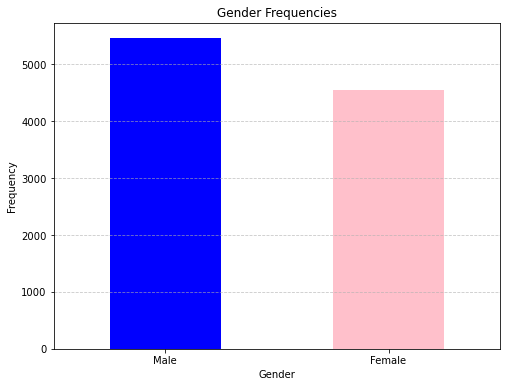

In [21]:
#histograms for gender with frequencies
gender_counts=df['gender'].value_counts()
# Plotting the bar chart
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue','pink'])
plt.title('Gender Frequencies')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()

In [22]:
#value counts for countries
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

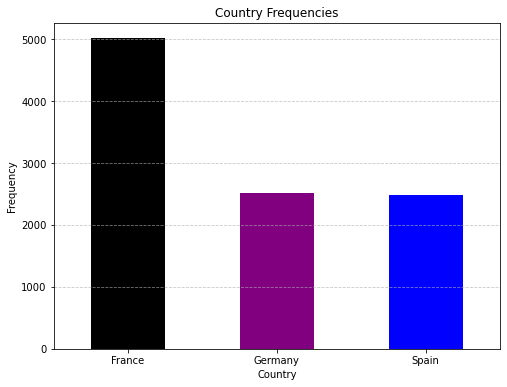

In [23]:
country_counts=df['country'].value_counts()
# Plotting the bar chart
plt.figure(figsize=(8, 6))
country_counts.plot(kind='bar', color=['black','purple','blue'])
plt.title('Country Frequencies')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()

In [24]:
#value counts for products_number
df['products_number'].value_counts()

1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64

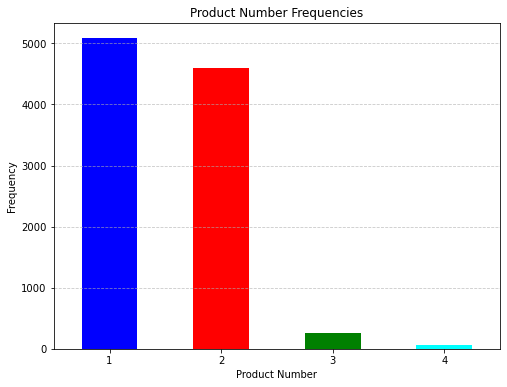

In [25]:
product_num_counts=df['products_number'].value_counts()
plt.figure(figsize=(8, 6))
product_num_counts.plot(kind='bar', color=['blue','red','green','cyan'])
plt.title('Product Number Frequencies')
plt.xlabel('Product Number')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()

In [26]:
#value counts for credit cards
df['credit_card'].value_counts()

1    7055
0    2945
Name: credit_card, dtype: int64

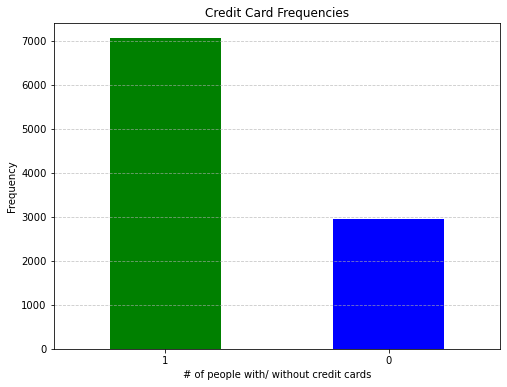

In [27]:
credit_card_counts=df['credit_card'].value_counts()
plt.figure(figsize=(8, 6))
credit_card_counts.plot(kind='bar', color=['green','blue'])
plt.title('Credit Card Frequencies')
plt.xlabel('# of people with/ without credit cards')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()

In [28]:
df['active_member'].value_counts()

1    5151
0    4849
Name: active_member, dtype: int64

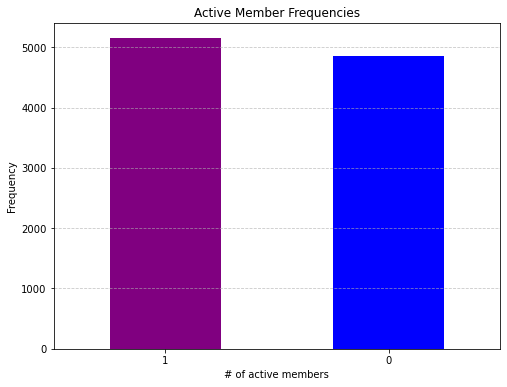

In [29]:
active_member_counts=df['active_member'].value_counts()
plt.figure(figsize=(8, 6))
active_member_counts.plot(kind='bar', color=['purple','blue'])
plt.title('Active Member Frequencies')
plt.xlabel('# of active members')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()

In [30]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

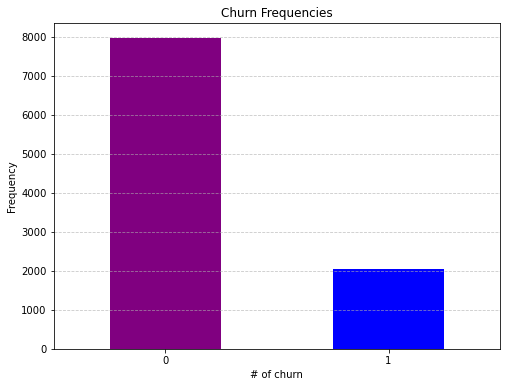

In [31]:
churn_counts=df['churn'].value_counts()
plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['purple','blue'])
plt.title('Churn Frequencies')
plt.xlabel('# of churn')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()

## One hot coding for gender and country column

In [32]:
# one hot coding for gender and country
df = pd.get_dummies(df, columns = ['country','gender'])
df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [33]:
# getting 7 random samples to make sure the program is running
df.sample(7)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
6926,660,34,1,0.00,2,1,0,9692.58,0,1,0,0,0,1
6154,754,39,3,160761.41,1,1,1,24156.03,0,0,1,0,1,0
4968,604,41,3,0.00,1,0,0,11819.84,0,0,0,1,0,1
4429,626,38,7,141074.59,1,1,0,52795.56,1,1,0,0,0,1
1252,693,68,4,97705.99,1,1,1,61569.07,0,1,0,0,0,1
2671,799,35,7,0.00,2,0,1,140780.80,0,0,0,1,0,1
3240,580,50,0,125647.36,1,1,0,57541.08,1,1,0,0,0,1


## numerical visualization

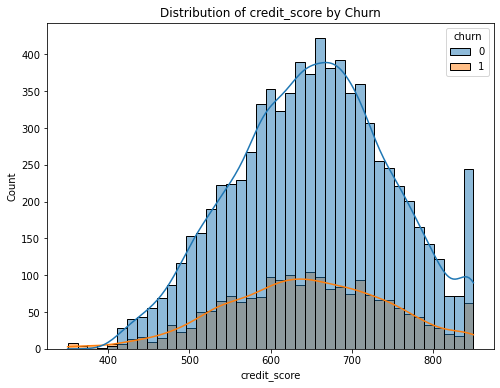

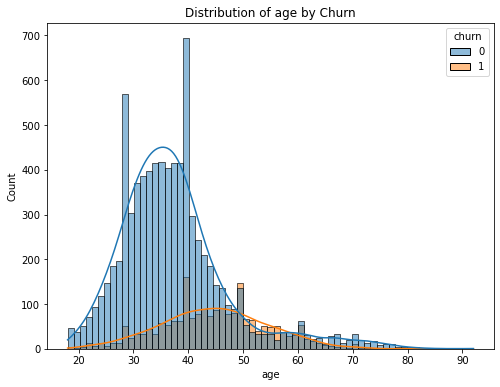

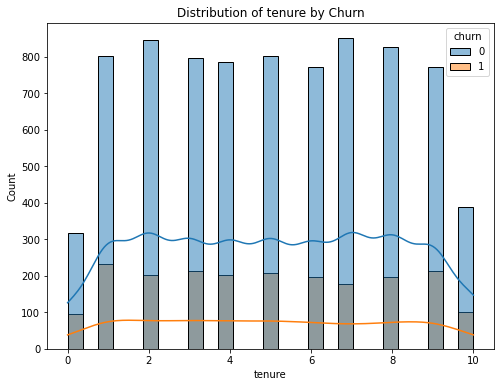

In [34]:
#visualizing the numerical distributional features
numerical_features = ["credit_score", "age", "tenure"]
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue="churn", kde=True)
    plt.title(f"Distribution of {feature} by Churn")
    plt.show()

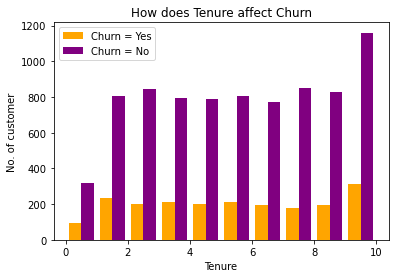

In [35]:
#how does tenure affect churn
tenure_yes = df[df['churn'] == 1].tenure
tenure_no = df[df['churn'] == 0].tenure

plt.hist([tenure_yes,tenure_no], color =['orange','purple'], label=['Churn = Yes','Churn = No'])
plt.legend()
plt.title('How does Tenure affect Churn')
plt.xlabel('Tenure')
plt.ylabel('No. of customer')
plt.show()

<AxesSubplot:>

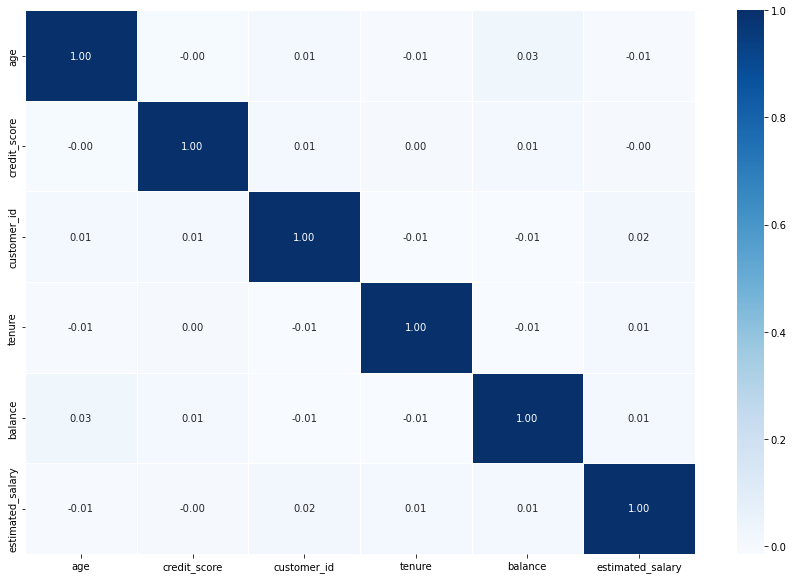

In [36]:
#displaying a correlation matrix of the important data needed for visualization
correlation_matrix = df2.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5, fmt='.2f')

In [37]:
df2.columns

Index(['age', 'credit_score', 'customer_id', 'tenure', 'balance',
       'estimated_salary'],
      dtype='object')

<AxesSubplot:>

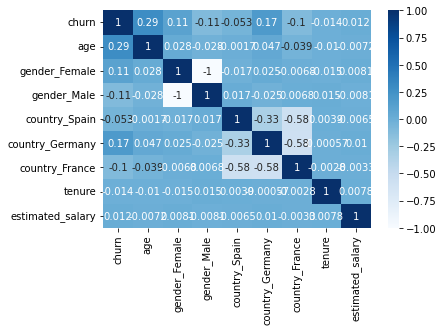

In [38]:
sns.heatmap(df[['churn', 'age','gender_Female','gender_Male','country_Spain','country_Germany',
                'country_France', 'tenure','estimated_salary']].corr(), annot=True, cmap='Blues')

<AxesSubplot:xlabel='credit_score', ylabel='age'>

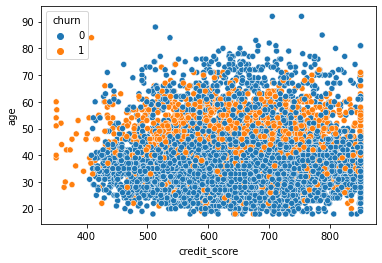

In [39]:
#credit score and age is not fully affected
sns.scatterplot(x='credit_score', y='age', hue='churn', data=df)

<AxesSubplot:xlabel='balance', ylabel='age'>

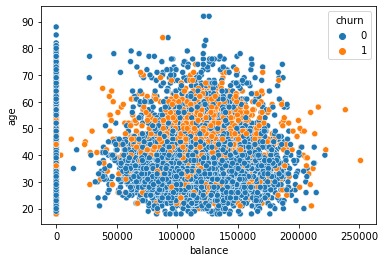

In [40]:
#balance and age is not in a correlation
sns.scatterplot(x='balance', y='age', hue='churn', data=df)

<AxesSubplot:xlabel='estimated_salary', ylabel='balance'>

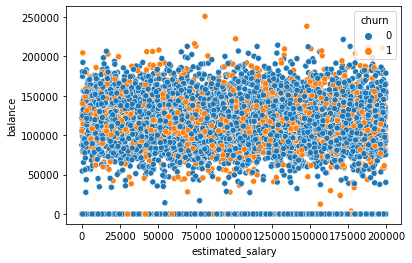

In [41]:
sns.scatterplot(x='estimated_salary', y='balance', hue='churn', data=df)

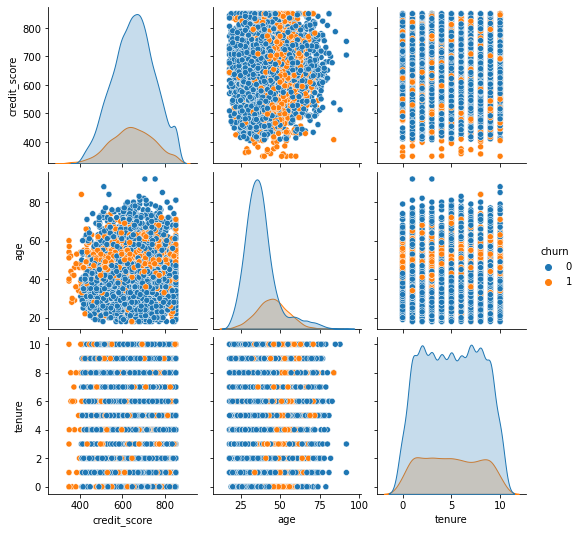

In [42]:
# Analyzing the relationships between numerical features and churn status
numerical_features.append("churn")
sns.pairplot(data=df[numerical_features], hue="churn")

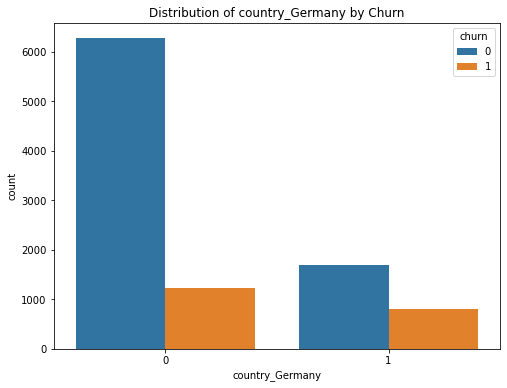

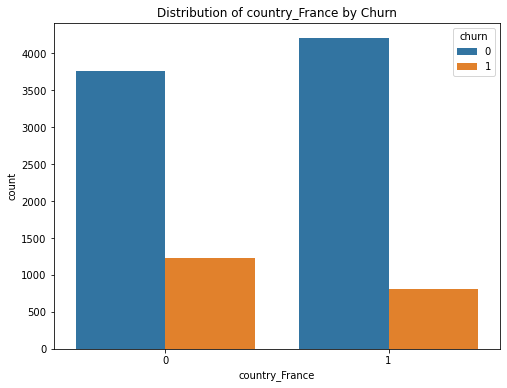

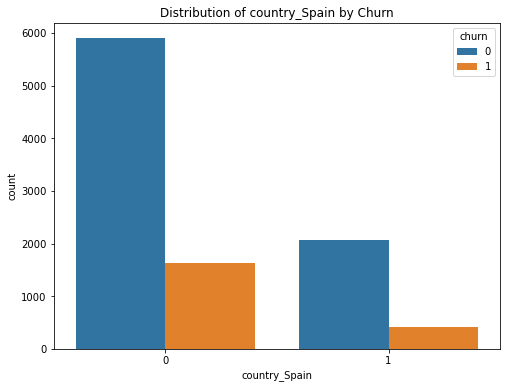

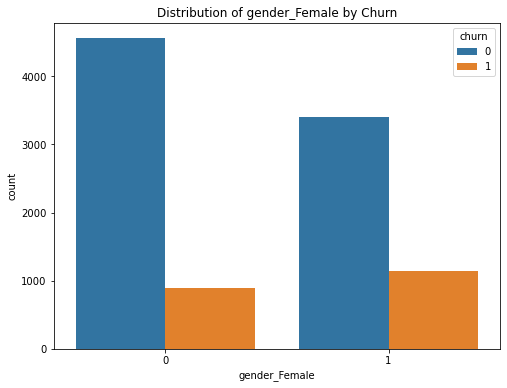

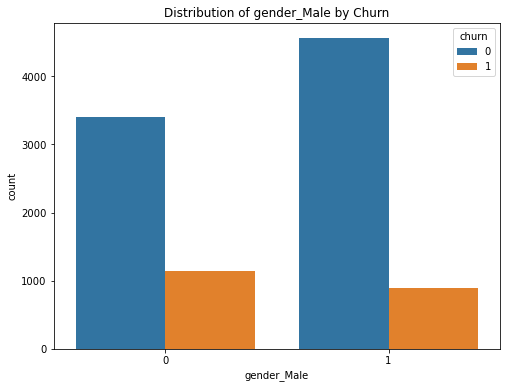

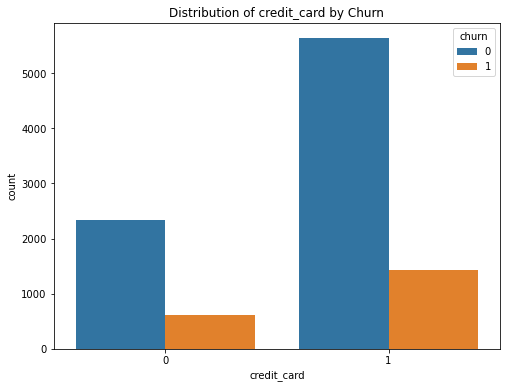

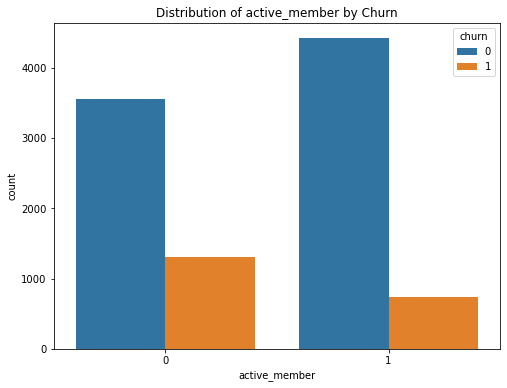

In [43]:
# Exploring the distributions of categorical features
categorical_features = ["country_Germany","country_France","country_Spain",
                        "gender_Female","gender_Male", "credit_card", "active_member"]
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature, hue="churn")
    plt.title(f"Distribution of {feature} by Churn")
    plt.show()

## Preliminary Decision Tree

In [44]:
# decision trees and random forest
# Splitting the model
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(df.drop('churn', axis = 1), df['churn'], 
                                                 random_state = 0, test_size = .30)

In [45]:
#Building the Decision Tree
from sklearn.tree import DecisionTreeClassifier as DTC
model = DTC().fit(X_train,Y_train)
#Getting Predictions
y_pred = model.predict(x_test)

## Random Forest

In [46]:
#Building Random Forest
from sklearn.ensemble import RandomForestClassifier as RFC
# For the right value of n_estimators
score = []
for estimators in range(1,10):
    model_rfc = RFC(n_estimators = estimators).fit(X_train,Y_train)
    score.append(model_rfc.score(x_test,y_test))

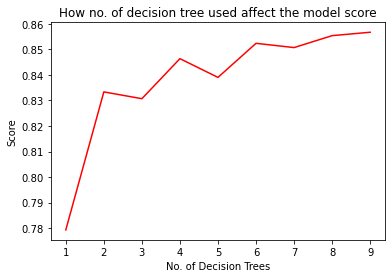

In [47]:
plt.plot(range(1,10), score, color = 'red')
plt.title('How no. of decision tree used affect the model score')
plt.xlabel('No. of Decision Trees')
plt.ylabel('Score')
plt.show()

In [48]:
# building model
model_rfc = RFC(n_estimators = 9).fit(X_train,Y_train)
# Getting predictions
y_pred_rfc = model_rfc.predict(x_test)

In [49]:
#Evaluation of the model
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
# Classification Report between both models
print(f" Classification Report for Random Forests : \n\n {classification_report(y_test,y_pred_rfc)}" ,
      '\n\n',
       f"Classification Report for Decision Trees : \n\n {classification_report(y_test,y_pred)}")

 Classification Report for Random Forests : 

               precision    recall  f1-score   support

           0       0.88      0.93      0.91      2379
           1       0.67      0.52      0.59       621

    accuracy                           0.85      3000
   macro avg       0.78      0.73      0.75      3000
weighted avg       0.84      0.85      0.84      3000
 

 Classification Report for Decision Trees : 

               precision    recall  f1-score   support

           0       0.88      0.87      0.87      2379
           1       0.52      0.54      0.53       621

    accuracy                           0.80      3000
   macro avg       0.70      0.70      0.70      3000
weighted avg       0.80      0.80      0.80      3000



## Heat map for y_pred

Text(33.0, 0.5, 'Predicted Value')

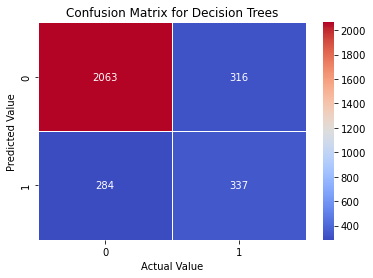

In [51]:
#annot=True ensures that annotations are added to each cell, 
# and fmt='d' specifies that the annotations will be formatted as integers.
#cmap changes the color or the heatmap
sns.heatmap(confusion_matrix(y_test,y_pred), cmap = 'coolwarm', 
            linewidth = 0.5, annot = True, fmt= 'd')
plt.title('Confusion Matrix for Decision Trees')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

In [52]:

#calclates the accuracy of the heatmap
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_matrix = np.array([[2051, 328],
                        [275, 346]])
# Calculate accuracy
correct_predictions = np.trace(conf_matrix)  # Sum of true positives and true negatives
total_predictions = np.sum(conf_matrix)     # Sum of all values in the confusion matrix
accuracy = correct_predictions / total_predictions
print("Accuracy:", accuracy)

Accuracy: 0.799


## Heatmap for Random Forests

Text(33.0, 0.5, 'Predicted Value')

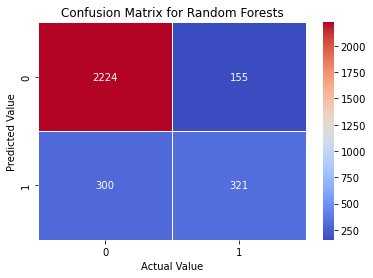

In [53]:
#heatmap for Random Forests 
#annot=True ensures that annotations are added to each cell, 
# and fmt='d' specifies that the annotations will be formatted as integers.
#cmap changes the color or the heatmap
sns.heatmap(confusion_matrix(y_test,y_pred_rfc), cmap = 'coolwarm', 
            linewidth = 0.5, annot = True, fmt= 'd')
plt.title('Confusion Matrix for Random Forests')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

## Interpreting the heatmap with accuracy score

In [54]:
#calclates the accuracy of the heatmap
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_matrix = np.array([[2238, 141],
                        [306, 315]])
# Calculate accuracy
correct_predictions = np.trace(conf_matrix)  # Sum of true positives and true negatives
total_predictions = np.sum(conf_matrix)     # Sum of all values in the confusion matrix
accuracy = correct_predictions / total_predictions
print("Accuracy:", accuracy)

Accuracy: 0.851


## KKN classifier

In [55]:
#KKN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

In [56]:
# KKN can achieve a performance of 79.68%
param_grid = {'n_neighbors': range(1,20)}
knn_cv =GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, Y_train)
knn_model =knn_cv.best_estimator_
print('The best hyparameters are',knn_cv.best_params_)
print('The best score is', knn_cv.best_score_)

The best hyparameters are {'n_neighbors': 18}
The best score is 0.7968571428571429


## Bar Chart for accuracy scores

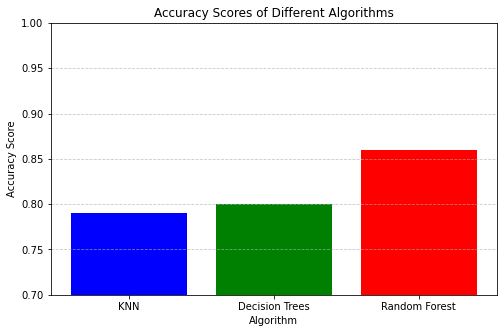

In [57]:
# Sample accuracy scores
accuracy_scores = {
    'KNN': 0.79,
    'Decision Trees': 0.80,
    'Random Forest': 0.86
}

# Extracting labels and scores
labels = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

# Creating the bar plot
plt.figure(figsize=(8, 5))
plt.bar(labels, scores, color=['blue', 'green', 'red'])

# Adding labels and title
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Algorithms')

# Displaying the plot
plt.ylim(0.7, 1.0)  # Set y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Conclusion

### -random forest displayed the highest of the 3 algortihms displaying 86%
### - Decision trees have the second highest with 80%
### - KKN last with a 79%
